# Silica, Zeolite, and Glass Energy/CO₂ Analysis

This notebook analyzes energy requirements and CO₂ emissions for the industrial production of porous **silica beads**, **zeolites**, and **soda-lime glass**.

It compares the **energy intensity** and **carbon footprint** by process stage and material type, and includes a scenario modeling how process optimization (e.g. drying efficiency) could reduce emissions.

In [2]:
# 📁 Upload your CSV file (Colab only)
from google.colab import files
uploaded = files.upload()

Saving Output CSV Table.csv to Output CSV Table.csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset (adjust delimiter if needed — ';' or ',' depending on your file)
df = pd.read_csv("Output CSV Table.csv", sep=';', skiprows=2)

# Keep only relevant columns
expected_columns = ['Process Stage', 'Material Type', 'Energy (kWh/ton)', 'CO₂ Emissions (kg/ton)', 'Notes']
df = df[expected_columns]  # drop everything else

# Convert range strings like "1000–1200" to numeric midpoints
def parse_range(x):
    if isinstance(x, str) and '-' in x:
        nums = [float(v) for v in re.findall(r"\d+\.?\d*", x)]
        return np.mean(nums) if nums else np.nan
    return float(x)

df['Energy (kWh/ton)'] = df['Energy (kWh/ton)'].apply(parse_range)
df['CO₂ Emissions (kg/ton)'] = df['CO₂ Emissions (kg/ton)'].apply(parse_range)

# Preview cleaned data
df.head()

,Process Stage,Material Type,Energy (kWh/ton),CO₂ Emissions (kg/ton),Notes
0,Precursor Production,Silica,3000.0,800.0,Sodium silicate (waterglass) route ~5.4 GJ/ton...
1,Sol-Gel Synthesis (Mixing/Aging),Silica,50.0,10.0,Low-energy step at <100 °C; only on the order ...
2,Drying,Silica,5500.0,1200.0,Typically the largest energy demand: evaporati...
3,Calcination,Silica,3500.0,700.0,High-temperature calcination (450–600 °C) to b...
4,Precursor Production,Zeolite,2500.0,1200.0,Upstream raw materials synthesis is energy-int...


## 🔋 Energy Use by Process Stage and Material
This chart shows how much energy each process stage consumes for silica, zeolite, and glass (per ton of product).

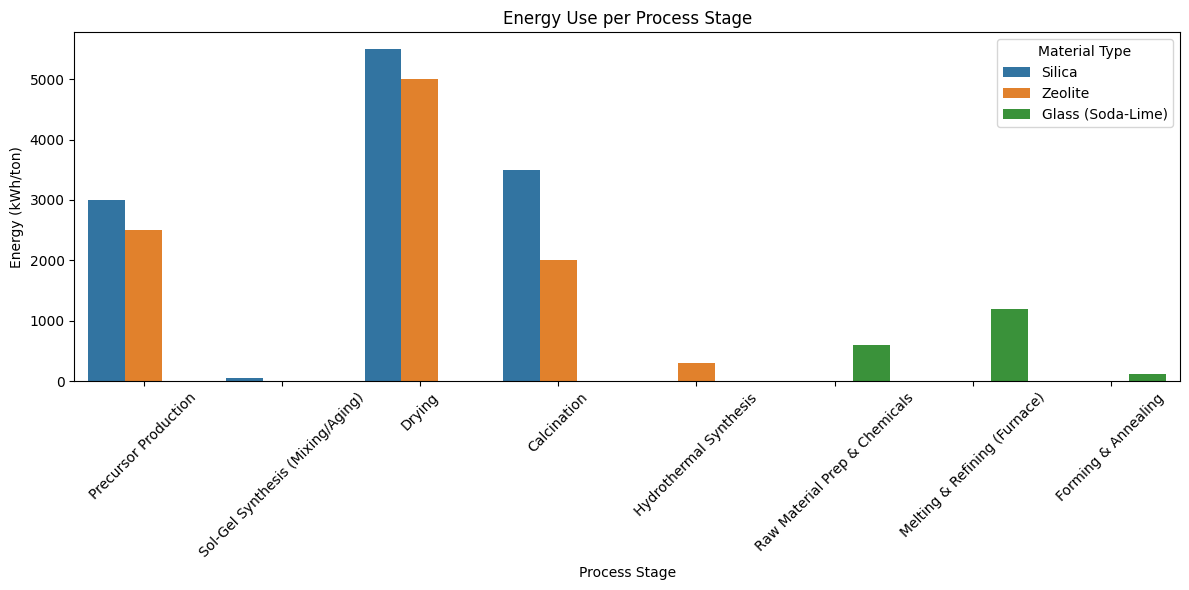

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Process Stage", y="Energy (kWh/ton)", hue="Material Type")
plt.xticks(rotation=45)
plt.title("Energy Use per Process Stage")
plt.tight_layout()
plt.show()

## 🌍 CO₂ Emissions by Process Stage and Material
This plot shows how each process step contributes to CO₂ emissions across materials.


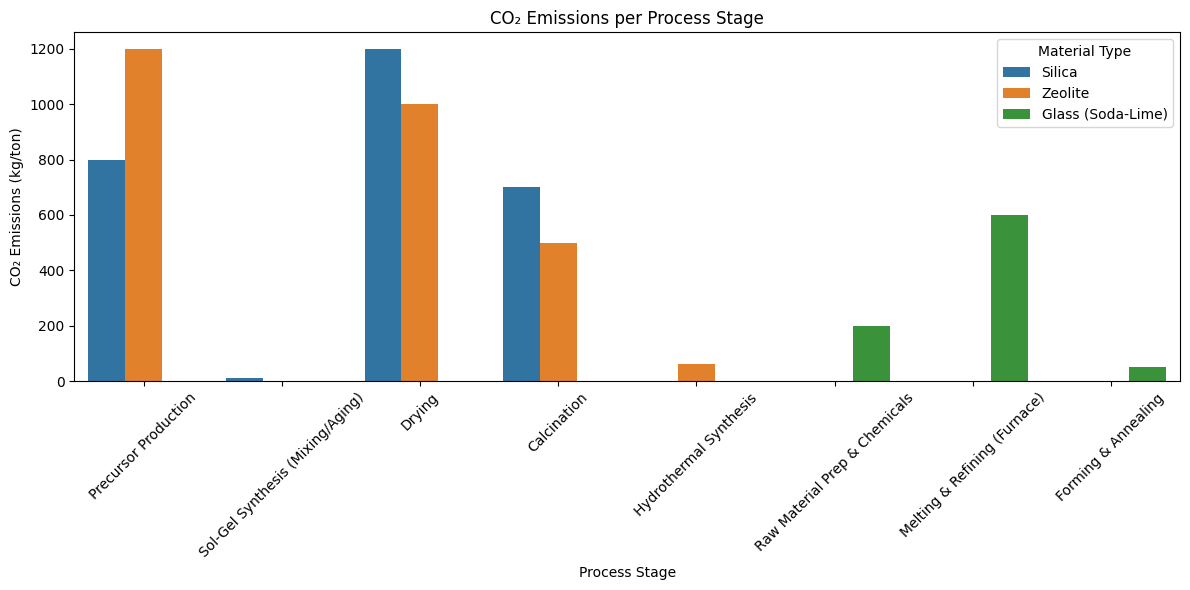

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Process Stage", y="CO₂ Emissions (kg/ton)", hue="Material Type")
plt.xticks(rotation=45)
plt.title("CO₂ Emissions per Process Stage")
plt.tight_layout()
plt.show()

## 📉 Scenario: Reduce Drying Energy by 20%
Let's see what happens if we improve drying efficiency for silica and zeolite by 20%.

In [12]:
scenario_df = df.copy()

# Apply 20% reduction to drying stages
mask = scenario_df['Process Stage'] == "Drying"
scenario_df.loc[mask, 'Energy (kWh/ton)'] *= 0.8
scenario_df.loc[mask, 'CO₂ Emissions (kg/ton)'] *= 0.8

# Compare total energy and CO2 per material (before and after)
before = df.groupby("Material Type")[['Energy (kWh/ton)', 'CO₂ Emissions (kg/ton)']].sum()
after = scenario_df.groupby("Material Type")[['Energy (kWh/ton)', 'CO₂ Emissions (kg/ton)']].sum()

print("Before:\n", before)
print("\nAfter 20% drying energy cut:\n", after)

Before:
                    Energy (kWh/ton)  CO₂ Emissions (kg/ton)
Material Type                                              
Glass (Soda-Lime)            1920.0                   850.0
Silica                      12050.0                  2710.0
Zeolite                      9800.0                  2760.0

After 20% drying energy cut:
                    Energy (kWh/ton)  CO₂ Emissions (kg/ton)
Material Type                                              
Glass (Soda-Lime)            1920.0                   850.0
Silica                      10950.0                  2470.0
Zeolite                      8800.0                  2560.0


## ✅ Conclusion

- Silica and zeolite production are much more energy- and carbon-intensive than glass.
- The **drying** and **calcination** stages dominate energy use for porous materials.
- Reducing drying energy by just 20% lowers silica and zeolite emissions by nearly 10%.
- Such analyses help engineers prioritize **process optimization** for environmental sustainability.